# Расчет потока газожидкостной смеси через штуцер
### Формула для расчета изоэнтропического массового расхода смеси
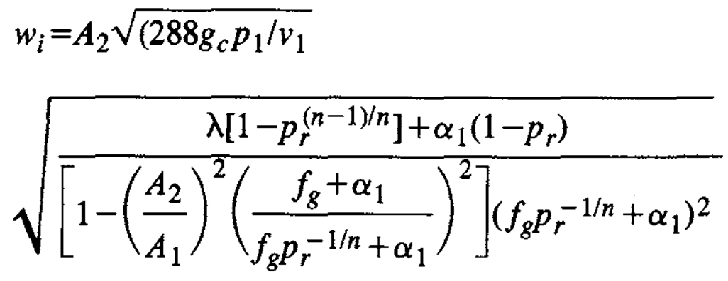
### где
$fg$ - весовая доля газа в потоке

$fo$ - весовая доля нефти в потоке

$fw$ - весовая доля воды в потоке

$M_m$ - молекулярный вес

$z$ - коэффициент сжимаемости газа

$F$ - показатель адиабаты $c_p/c_v$

$\rho_g$ - плотность пара

$\rho_o$ - плотность нефти

$\rho_w$ - плотность воды

$v_1$ -  удельный объем

$T$ - температура

$R$ - универсальная газовая постоянная

$p_1$ - давление перед штуцером

$p_2$ - давление в штуцере

$p_4$ - давление в трубе далеко за штуцером

$p_3$ - давление в трубе сразу за штуцером

$d_1$ - диаметр трубы до штуцера

$d_2$ - диаметр штуцера

$A_1$ - площадь трубы $A_1=\frac{\pi*d_1^2}{4}$

$A_2$ - площадь штуцера $A_2=\frac{\pi*d_2^2}{4}$

$C_{vg}$ - теплоемкость при постоянном объеме для газа

$C_{vo}$ - теплоемкость при постоянном объеме для нефти 

$C_{vw}$ - теплоемкость при постоянном объеме для воды 

### $n=\frac{f_g*F*C_{vg}+f_o*C_{vo}+f_w*C_{vw}}{f_g*C_{vg}+f_o*C_{vo}+f_w*C_{vw}}$

### $\lambda=f_g+\frac{(f_g*C_{vg}+f_o*C_{vo}+f_w*C_{vw})*M_m}{z*R}$

### $\alpha_1 = \frac{1}{v_1}*(\frac{f_o}{\rho_o}+\frac{f_w}{\rho_w})$

### $p_3=p_1-\frac{p_1-p_4}{1-(\frac{d_2}{d_1})^{1.85}}$ 

### $ p_r=\frac{p_2}{p_1}$  при  $p_2 > p_3 $ и

### $ p_r=\frac{p_3}{p_1}$  при  $p_3 > p_2 $ 




## Расчетный массовый расход вычисляется по формуле:
### $w_c=w_i*K$

$ K=\frac{w_a}{w_i} $

$w_a$ - фактический массовый расход

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *

In [11]:
v1_m3kg=57.8 # удельный объем м^3/кг для пара при 20 С=57.8
fg=1 # весовая доля газа в потоке
fo=0 # весовая доля нефти в потоке
fw=0 # весовая доля воды в потоке
M_m=18 # молекулярный вес, моль пара
z=0.999 # коэффициент сжимаемости газа
F=1.3 #показатель адиабаты Cp/Cv
rog_kgm3=0.01729 # плотность пара при 20 С
roo_kgm3=800 # плотность нефти   кг/м3
row_kgm3=1000 # плотность воды   кг/м3
T_C=20 # температура, С
p2_atm=5 #давление в штуцере
p1_atm=15 # давление перед штуцером
p4_atm=10 # давление в трубе далеко за штуцером
d1_mm=100 #диаметр трубы до штуцера
d2_mm=5 #диаметр штуцера
def wi_m3d(p1_atm, v1_m3kg, T_C):
    g_c=32.17 #(lbm-ft)/(lbf-second^2)
    roo=roo_kgm3*0.062428 # плотность нефти  Ibm/ft3
    row=row_kgm3*0.062428 # плотность воды  Ibm/ft3
    gamma_o=141.5/roo_kgm3/1000-131.5 #плотность нефти, API
    T_F=T_C / 100 * 180 + 32 # температура, F
    R_ftIbtlbmmolR=1545.348 # универсальная газовая постоянная  (ft-Ibf)/(lbm mol-R)
    Cvg=z*R_ftIbtlbmmolR/(M_m*(F-1)) # теплоемкость при постоянном объеме для газа (ft-Ibf)/(lbm- OF)
    Cvo=778*((0.355+0.00176*gamma_o)+(0.0051+1.167*gamma_o/100000)*T_F) #  теплоемкость при постоянном объеме для нефти (ft-Ibf)/(lbm- OF)
    Cvw=779.912 # теплоемкость при постоянном объеме для воды 4.176 кДж/кгК= 4.176*0,24*778.169=(ft-Ibf)/(lbm- OF)
    p1_psia=p1_atm*14.2233
    p2_psia=p2_atm*14.2233
    p4_psia=p4_atm*14.2233
    d1_ft=d1_mm/304.8
    d2_ft=d2_mm/304.8
    p3_psia=p1_psia-(p1_psia-p4_psia)/(1-(d2_ft/d1_ft)**1.85) #давление сразу за штуцером
    v1_ft3lbm=v1_m3kg*16.01845
    alf=(1/v1_ft3lbm)*(fo/roo+fw/row)
    A1_ft2=3.14*d1_ft**2/4
    A2_ft2=3.14*d2_ft**2/4
    n=(fg*F*Cvg+fo*Cvo+fw*Cvw)/(fg*Cvg+fo*Cvo+fw*Cvw)
    lambd=fg+((fg*Cvg+fo*Cvo+fw*Cvw)*M_m/(z*R_ftIbtlbmmolR))
    if p3_psia <= p2_psia: 
        pr=p2_psia/p1_psia
    else: 
        pr=p3_psia/p1_psia
    Ab=(lambd*(1-pr**((n-1)/n))+alf*(1-pr))/((1-((A2_ft2/A1_ft2)**2)*((fg+alf)/((fg*pr**(-1/n))+alf))**2)*((fg*pr**(-1/n))+alf)**2)
    wi_lbmsec=A2_ft2*((288*g_c*p1_psia/v1_ft3lbm)*Ab)**0.5
    wi_kgsec=wi_lbmsec*0.45359 # перевод в кг/с
    wi_m3d=wi_kgsec*86400*(fg*rog_kgm3+fo*roo_kgm3+fw*row_kgm3) #перевод в м3/сут
    return wi_m3d
print(wi_m3d(p1_atm, v1_m3kg, T_C))

3.014627670688501


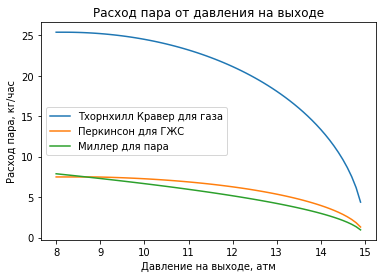

In [16]:
v1_m3kg=57.8 # удельный объем м^3/кг для пара при 20 С=57.8
fg=1 # весовая доля газа в потоке
fo=0 # весовая доля нефти в потоке
fw=0 # весовая доля воды в потоке
M_m=18 # молекулярный вес, моль пара
z=0.999 # коэффициент сжимаемости газа
F=1.3 #показатель адиабаты Cp/Cv
rog_kgm3=0.01729 # плотность пара при 20 С
roo_kgm3=800 # плотность нефти   кг/м3
row_kgm3=1000 # плотность воды   кг/м3
T_C=20 # температура, С
p1_atm=15
p4_atm=8.9 # давление в трубе далеко за штуцером
d1_mm=100 #диаметр трубы до штуцера
d2_mm=5 #диаметр штуцера
p2_atm_a = np.arange(8,15,0.1)
def wi_kghr(p1_atm, p2_atm, v1_m3kg, T_C):
    g_c=32.17 #(lbm-ft)/(lbf-second^2)
    roo=roo_kgm3*0.062428 # плотность нефти  Ibm/ft3
    row=row_kgm3*0.062428 # плотность воды  Ibm/ft3
    gamma_o=141.5/roo_kgm3/1000-131.5 #плотность нефти, API
    T_F=T_C / 100 * 180 + 32 # температура, F
    R_ftIbtlbmmolR=1545.348 # универсальная газовая постоянная  (ft-Ibf)/(lbm mol-R)
    Cvg=z*R_ftIbtlbmmolR/(M_m*(F-1)) # теплоемкость при постоянном объеме для газа (ft-Ibf)/(lbm- OF)
    Cvo=778*((0.355+0.00176*gamma_o)+(0.0051+1.167*gamma_o/100000)*T_F) #  теплоемкость при постоянном объеме для нефти (ft-Ibf)/(lbm- OF)
    Cvw=779.912 # теплоемкость при постоянном объеме для воды 4.176 кДж/кгК= 4.176*0,24*778.169=(ft-Ibf)/(lbm- OF)
    p1_psia=p1_atm*14.2233
    p2_psia=p2_atm*14.2233
    p4_psia=p4_atm*14.2233
    d1_ft=d1_mm/304.8
    d2_ft=d2_mm/304.8
    p3_psia=p1_psia-(p1_psia-p4_psia)/(1-(d2_ft/d1_ft)**1.85)
    v1_ft3lbm=v1_m3kg*16.01845
    alf=(1/v1_ft3lbm)*(fo/roo+fw/row)
    A1_ft2=3.14*d1_ft**2/4
    A2_ft2=3.14*d2_ft**2/4
    n=(fg*F*Cvg+fo*Cvo+fw*Cvw)/(fg*Cvg+fo*Cvo+fw*Cvw)
    lambd=fg+((fg*Cvg+fo*Cvo+fw*Cvw)*M_m/(z*R_ftIbtlbmmolR))
    if p3_psia <= p2_psia: 
        pr=p2_psia/p1_psia
    else: 
        pr=p3_psia/p1_psia
    Ab=(lambd*(1-pr**((n-1)/n))+alf*(1-pr))/((1-((A2_ft2/A1_ft2)**2)*((fg+alf)/((fg*pr**(-1/n))+alf))**2)*((fg*pr**(-1/n))+alf)**2)
    wi_lbmsec=A2_ft2*((288*g_c*p1_psia/v1_ft3lbm)*Ab)**0.5
    wi_kghr=wi_lbmsec*0.45359*3600 #*3.28# перевод в кг/час 3.28 сам придумал
#    wi_m3d=1305.11*wi_kgsec*86400*(fg*rog_kgm3+fo*roo_kgm3+fw*row_kgm3) #перевод в м3/сут 1305.11 коэф сам придумал
    return wi_kghr
q=np.array([])
for pd in p2_atm_a:
    p1=wi_kghr(p1_atm, pd, v1_m3kg, T_C)
    q=np.append(q,p1)
# Расход газа через штуцер в зависимости от давления после штуцера, при других постоянных параметрах
d_mm=5 # диаметр штуцера, мм
Po_atm=15 # давление до штуцера, атм
ro_g=0.017/1.27 # удельная плотность пара
Tu_C=20 # температура 
k=1.3 # показатель адиабаты
Pd_atm_a = np.arange(8,15,0.1) # давление после штуцера, атм
def Q_gas_valve_kghr(d_mm, Pu_atm, Pd_atm, ro_g, Tu_C):
    d_in = d_mm * 0.03937 # диаметр штуцера, дюйм
    Po_psi = Po_atm * 14.2233 # давление до штуцера, psi
    Pd_psi = Pd_atm * 14.2233 # давление после штуцера, psi
    Tu_F = Tu_C / 100 * 180 + 32 # температура, F
    Pd_Po_crit = (2 / (k + 1)) ** (k / (k - 1)) # критическое отношение давлений до и после штуцера
    Cd = 0.865
    g = 32.17 # ft/sec^2 
    C1 = (Pd_Po_crit ** (2 / k) - Pd_Po_crit ** (1 + 1 / k)) ** 0.5
    C2 = (2 * g * k / (k - 1)) ** 0.5
    A=3.14*d_in**2/4 # площадь
    Qg_crit = 155.5 * Cd * A * Po_psi * C1 * C2 / (ro_g * (Tu_F + 460))**0.5 #критический расход пара
    Pd_Po = Pd_atm / Po_atm
    C0 = ((Pd_Po ** (2 / k) - Pd_Po ** (1 + 1 / k))) ** 0.5
    if Pd_Po <= Pd_Po_crit: 
        Q_gas_valve_m3d = Qg_crit * 28.31993658
    else: 
        Q_gas_valve_m3d = Qg_crit * 28.31993658 * C0 / C1
    Q_gas_valve_kghr=Q_gas_valve_m3d/24/57.8
    return Q_gas_valve_kghr
qq=np.array([])
for pd in Pd_atm_a:
    p1=Q_gas_valve_kghr(d_mm, Po_atm, pd, ro_g, Tu_C)
    qq=np.append(qq,p1)
d0_mm=5  # диаметр отверстия
d1_mm=100 # диаметр трубы
C0 =0.8 # коэффициент разряда штуцера
Y1=0.89487 # коэффициент расширения пара
p1_atm=15 # давление перед отверстием
p2_atm=10 # давление за отверстием
vfg_m3kg=57.8 # удельный объем пара
ro_kgm3=1/vfg_m3kg
vf_m3kg=0.001# удельный объем жидкости
a=37.037
b=0.345
X=100 #сухость пара
p3_atm_a = np.arange(8,15,0.1)
def w_kghr(d0_mm, p2_atm):
    beta=d0_mm/d1_mm
    f_atm=p1_atm-p2_atm  # падение давления в отверстии
    f_kPa=f_atm*100
    w_kgsec=3.512407*10**(-5)*C0*Y1*d0_mm**2*(f_kPa*ro_kgm3)**0.5/(1-beta**4)**0.5
    w_kghr=w_kgsec*3600
    return w_kghr
qqq=np.array([])
for pd in p3_atm_a:
    p1=w_kghr(d0_mm, pd)
    qqq=np.append(qqq,p1)     
plt.plot(Pd_atm_a,qq, label='Тхорнхилл Кравер для газа') #THORNHILL CRAVER
plt.plot(p2_atm_a,q, label='Перкинсон для ГЖС ')
plt.plot(p3_atm_a,qqq, label='Миллер для пара')
plt.title('Расход пара от давления на выходе')
plt.xlabel('Давление на выходе, атм')
plt.ylabel('Расход пара, кг/час')
plt.legend()
plt.show() 